In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
PATH = '/home/harsh/Downloads/FER2013/'

In [18]:
tfms = get_transforms(do_flip = False,)
data = ImageList.from_folder(PATH).split_by_folder().label_from_folder().transform(tfms).databunch(bs = 128)

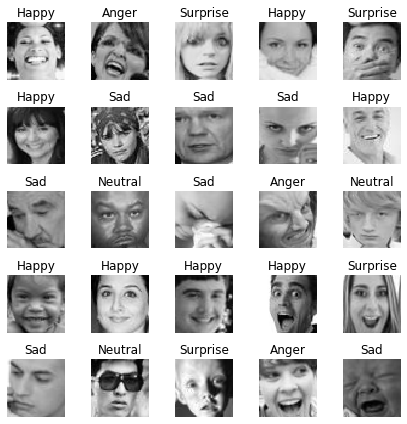

In [19]:
data.show_batch(5,figsize = (6,6))

In [20]:
learn = cnn_learner(data,models.resnet50,metrics = [accuracy,error_rate])

In [21]:
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.551735,2.020239,0.326832,0.673168,00:23
1,2.025356,1.769546,0.341878,0.658122,00:20
2,1.718759,1.614867,0.380607,0.619393,00:19
3,1.636388,1.573544,0.394539,0.605461,00:19
4,1.577831,1.529380,0.405684,0.594316,00:19
5,1.547328,1.507165,0.419337,0.580663,00:19
6,1.514520,1.491586,0.421845,0.578155,00:20
7,1.517601,1.488238,0.423238,0.576762,00:20


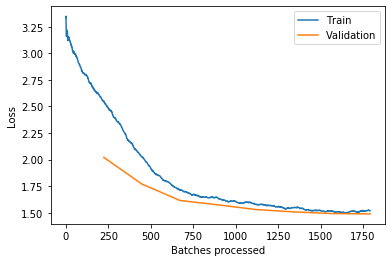

In [22]:
learn.recorder.plot_losses()
learn.export('resnet50-frozen.pkl')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Sad', 'Happy', 171),
 ('Neutral', 'Happy', 152),
 ('Sad', 'Neutral', 132),
 ('Anger', 'Happy', 121),
 ('Happy', 'Neutral', 111),
 ('Fear', 'Happy', 110),
 ('Fear', 'Surprise', 97),
 ('Anger', 'Neutral', 91),
 ('Fear', 'Sad', 90),
 ('Fear', 'Neutral', 80),
 ('Sad', 'Anger', 69),
 ('Neutral', 'Sad', 66),
 ('Anger', 'Sad', 63),
 ('Anger', 'Fear', 58),
 ('Happy', 'Sad', 57),
 ('Neutral', 'Surprise', 54),
 ('Surprise', 'Happy', 52),
 ('Sad', 'Fear', 48),
 ('Anger', 'Surprise', 44),
 ('Fear', 'Anger', 44),
 ('Neutral', 'Fear', 42),
 ('Surprise', 'Neutral', 42),
 ('Happy', 'Anger', 41),
 ('Happy', 'Surprise', 41),
 ('Neutral', 'Anger', 40),
 ('Surprise', 'Fear', 31),
 ('Sad', 'Surprise', 29),
 ('Happy', 'Fear', 22),
 ('Disgust', 'Happy', 16),
 ('Disgust', 'Fear', 10),
 ('Disgust', 'Sad', 10),
 ('Surprise', 'Anger', 10),
 ('Disgust', 'Anger', 9),
 ('Surprise', 'Sad', 7),
 ('Disgust', 'Neutral', 6),
 ('Disgust', 'Surprise', 4)]

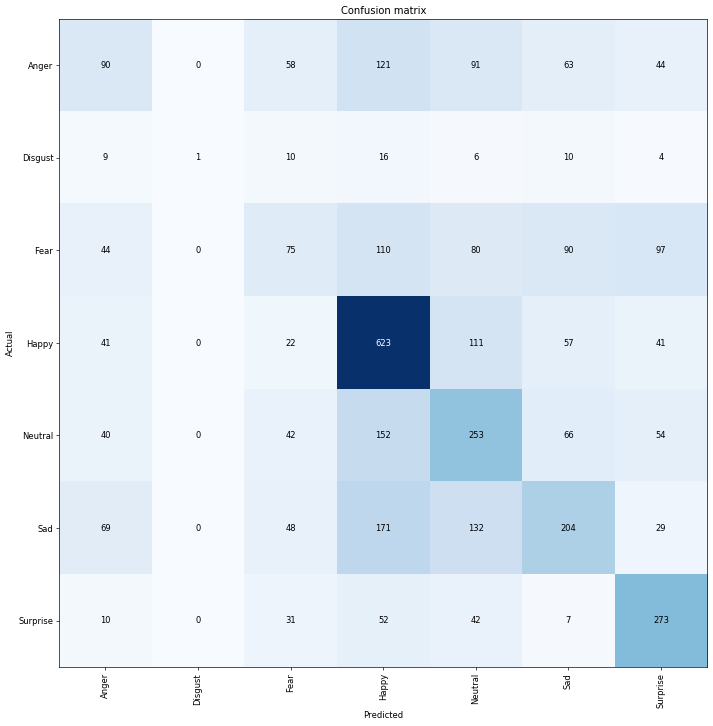

In [24]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [25]:
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.436839,1.366663,0.479799,0.520201,00:28
1,1.273045,1.214108,0.544441,0.455559,00:28
2,1.171180,1.126994,0.580384,0.419615,00:27
3,1.036682,1.067730,0.606297,0.393703,00:27
4,0.902013,1.043831,0.625522,0.374478,00:27
5,0.770420,1.056614,0.628309,0.371691,00:27
6,0.637696,1.094653,0.630538,0.369462,00:27
7,0.549030,1.109930,0.634160,0.365840,00:27


In [26]:
learn.export('resnet50-unfrozen.pkl')

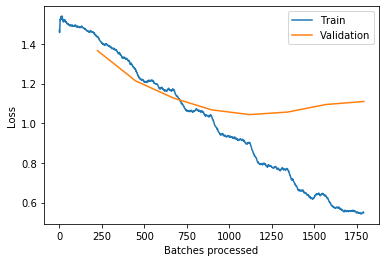

In [27]:
learn.recorder.plot_losses()

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


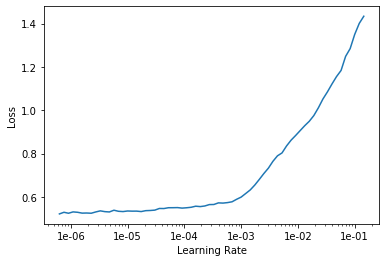

In [29]:
learn.recorder.plot()

In [41]:
data_test = ImageList.from_folder(PATH).split_by_folder(train = 'train', valid = 'test').label_from_folder().transform(tfms).databunch(bs = 128)

In [31]:
learn.data = data


learn.validate(data.valid_dl)

[1.0345098, tensor(0.6498), tensor(0.3502)]

In [33]:
learn = load_learner(PATH,'resnet50-frozen.pkl')

In [34]:
learn.data = data
learn.validate(data.valid_dl)

[1.4891374, tensor(0.4191), tensor(0.5809)]

In [35]:
data = ImageList.from_folder(PATH).split_by_folder().label_from_folder().transform(tfms).databunch(bs = 128)
learn = cnn_learner(data,models.resnet34,metrics = [accuracy,error_rate])

In [36]:
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.659110,1.985455,0.289774,0.710226,00:12
1,2.095353,1.774747,0.310950,0.689050,00:13
2,1.771071,1.685609,0.335748,0.664252,00:13
3,1.691461,1.635658,0.354416,0.645584,00:13
4,1.640387,1.609772,0.373642,0.626358,00:13
5,1.627852,1.582377,0.379772,0.620228,00:13
6,1.605193,1.580045,0.371134,0.628866,00:14
7,1.597246,1.575196,0.377264,0.622736,00:15


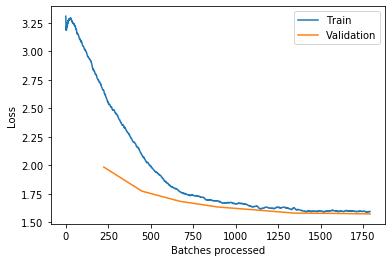

In [37]:
learn.recorder.plot_losses()


In [38]:
learn.export('resnet34-frozen.pkl')

In [39]:
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.505888,1.427873,0.439120,0.560880,00:17
1,1.313576,1.235690,0.526609,0.473391,00:17
2,1.175784,1.174051,0.557816,0.442184,00:19
3,1.077855,1.098167,0.599053,0.400947,00:18
4,0.956796,1.094021,0.598217,0.401783,00:18
5,0.809817,1.072616,0.619671,0.380329,00:17
6,0.698448,1.104530,0.624687,0.375313,00:19
7,0.644514,1.120403,0.619393,0.380607,00:18


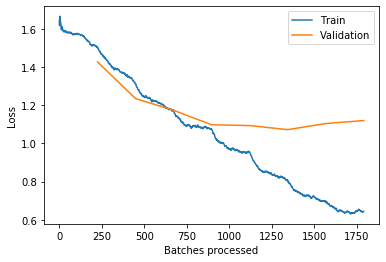

In [40]:
learn.recorder.plot_losses()
learn.export('resnet-unfrozen.pkl')

In [42]:
learn.data = data_test
learn.validate(data_test.valid_dl)

[1.0712234, tensor(0.6453), tensor(0.3547)]

In [43]:
learn = cnn_learner(data,models.resnet101,metrics = [accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/harsh/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [44]:
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.524889,2.067051,0.290053,00:31
1,1.943327,1.715986,0.339649,00:30
2,1.757875,1.713214,0.373642,00:31
3,1.672449,1.581897,0.384508,00:31
4,1.623780,1.606017,0.403455,00:33
5,1.572266,1.600743,0.418780,00:33
6,1.550064,1.531315,0.421287,00:33
7,1.540158,1.570334,0.424352,00:32


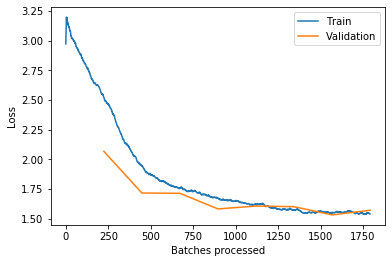

In [45]:
learn.recorder.plot_losses()

In [46]:
learn.export('resnet101-frozen.pkl')

In [47]:
learn.unfreeze()
learn.fit_one_cycle(8,max_lr = slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.453425,1.425108,0.474784,00:47
1,1.329843,1.221305,0.540541,00:46
2,1.208914,1.175613,0.561159,00:45
3,1.090434,1.170018,0.581778,00:45
4,0.958695,1.230748,0.605461,00:48
5,0.764347,1.089352,0.625522,00:48
6,0.600125,1.140314,0.631652,00:45
7,0.506989,1.184280,0.632210,00:44


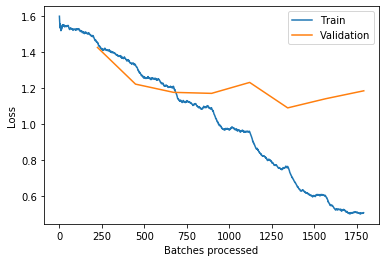

In [48]:
learn.recorder.plot_losses()

In [49]:
learn.data = data_test
learn.validate(data_test.valid_dl)

[1.1504394, tensor(0.6434)]

In [50]:
learn.export('resnet101-unfrozen.pkl')